<a href="https://colab.research.google.com/github/shrestha94sujan/stocks/blob/master/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print('welcome to stock prediction Using Simple Linear Regression!')


welcome to stock prediction Using Simple Linear Regression!


In [2]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=d23e0bcbc8b8848b96cf362a3ccc7ccda21ba695525342da008de2da09d951aa
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


### **Using yfinance library to import the history stock data**

In [4]:
import yfinance as yf
import pandas as pd

pd.options.display.max_rows=None

aapl = yf.Ticker('AAPL')

historical_data = aapl.history(period='30y')
historical_data.reset_index(inplace=True)

df = historical_data.copy()

# df['PCD'] = df['Close'] - df['Open']

df.dropna(inplace=True)

print(df.head(10))
# Size of the dataframe
print('Dataframe size: {}'.format(df.shape[0]))

         Date  Open  High   Low  Close      Volume  Dividends  Stock Splits
1  1990-05-22  1.17  1.21  1.16   1.20  75272400.0        0.0           0.0
2  1990-05-23  1.20  1.23  1.20   1.22  51878400.0        0.0           0.0
3  1990-05-24  1.23  1.23  1.21   1.22  37032800.0        0.0           0.0
4  1990-05-25  1.15  1.18  1.13   1.16  80830400.0        0.0           0.0
5  1990-05-29  1.16  1.20  1.14   1.19  60802000.0        0.0           0.0
6  1990-05-30  1.21  1.21  1.20   1.20  69204800.0        0.0           0.0
7  1990-05-31  1.21  1.21  1.19   1.20  25771200.0        0.0           0.0
8  1990-06-01  1.20  1.22  1.18   1.18  39309200.0        0.0           0.0
9  1990-06-04  1.18  1.19  1.16   1.18  44856000.0        0.0           0.0
10 1990-06-05  1.19  1.19  1.13   1.15  74858000.0        0.0           0.0
Dataframe size: 7559


### **Adding a few import statements.**

In [5]:
from sklearn import preprocessing
import numpy as np
import math
import seaborn as sns; sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### **Feature Selection**

**Splitting the data into training and test dataset**


In [6]:
# We need standardize our dataset

X = df[['Open', 'Volume', 'Dividends', 'Stock Splits']]
y = df[['Close']]

starting_point = int(math.ceil(.8 * len(df)))
print(starting_point)

X_train = X[:starting_point].values
y_train = y[:starting_point].values

X_test = X[starting_point:].values
y_test = y[starting_point:].values

6048


### **A few more import statements**

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.compose import TransformedTargetRegressor 
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
%matplotlib inline

### **LinearRegression:**

Using the linearRegression classifier to predict the intercept and coefficients to be used for predicting the y values. i.e. y = mx + c.

In [8]:
regr = TransformedTargetRegressor(regressor=LinearRegression(), transformer=MinMaxScaler())
regr.fit(X_train, y_train)

accuracy = regr.score(X_test, y_test)

print('Accuracy: {}%\n'.format(accuracy * 100))
y_predicted = regr.predict(X_test)

new_df = pd.DataFrame({'Actual closing price': y_test.flatten(), 'Predicted': y_predicted.flatten()})
print(new_df.head(25))

Accuracy: 99.8485569370983%

    Actual closing price  Predicted
0                  78.57  78.442367
1                  79.46  78.521345
2                  80.95  79.636942
3                  80.74  80.946992
4                  82.21  81.184947
5                  81.90  82.488234
6                  81.34  81.974579
7                  82.49  81.267452
8                  83.43  82.425282
9                  83.76  83.555413
10                 83.53  84.033645
11                 84.87  84.513970
12                 85.36  85.745401
13                 85.01  85.197903
14                 83.59  85.116852
15                 82.67  83.458111
16                 83.51  82.830901
17                 83.40  83.561074
18                 83.49  83.520639
19                 83.20  83.540378
20                 82.34  83.132670
21                 82.27  82.660031
22                 81.77  82.140987
23                 81.84  81.651616
24                 82.33  81.802024


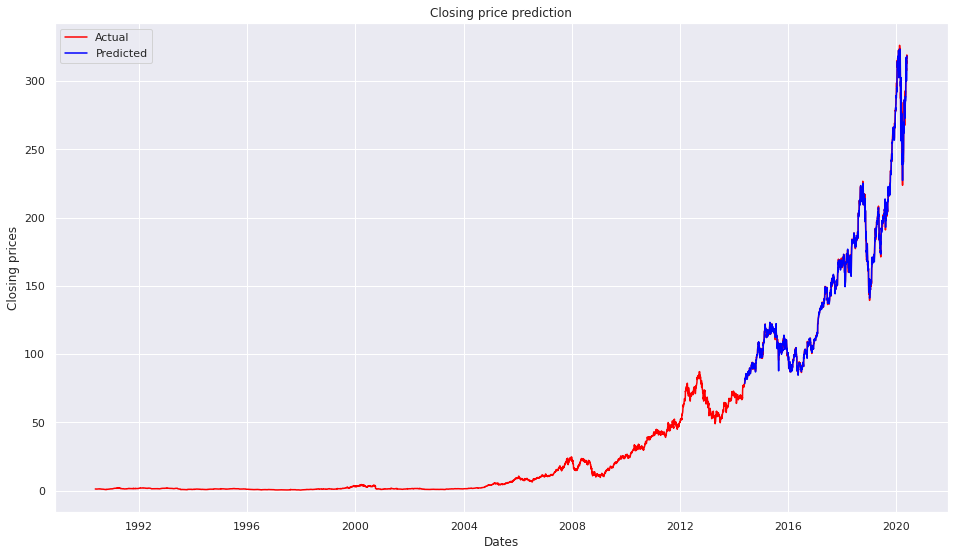

In [9]:
#Plotting the diagram

plt.figure(figsize=(16, 9))
plt.plot(df['Date'], df['Close'], c='red', label='Actual')
plt.plot(df['Date'].iloc[6048:], y_predicted.flatten(), c='blue', label='Predicted')
plt.xlabel('Dates')
plt.ylabel('Closing prices')
plt.title('Closing price prediction')
plt.legend()
plt.show()

Observation:

Our linear regression model did predict the rise and fall of the closing prices very accurately.